# 숫자 손글씨 분류 경진대회 베이스라인

이번 대회는 숫자 이미지를 학습하여 각 이미지가 나타내는 숫자가 무엇인지 분류하는 대회입니다.

여러분에게 주어진 학습 데이터는 총 5000장이며, 다른 test set 5000장을 맞추는 것이 대회의 목적입니다.

그럼 시작해볼까요?

## train_data.csv 확인하기

먼저 주어진 train_data.csv를 확인해보겠습니다

In [5]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

train = pd.read_csv('data/train/train_data.csv')
train.rename(columns={'filen_name': 'file_name'}, inplace=True)
train.head()

,file_name,label
0,train0001.png,8
1,train0002.png,8
2,train0003.png,8
3,train0004.png,8
4,train0005.png,8


주어진 csv파일 내부에는 이미지 파일의 이름과 그에 맞는 라벨이 적혀있습니다.

이미지 이름으로는 이미지 내부의 정보를 알 수 없으니 이제 이미지를 본격적으로 불러오겠습니다

## 이미지 불러오기

컴퓨터는 이미지 정보를 어떤 형식으로 저장하고 있을까요?

먼저 샘플 이미지를 불러와서 확인해 보겠습니다



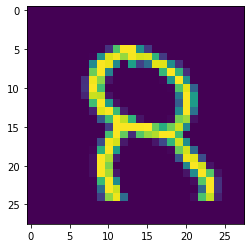

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

file_dir = 'data/train/'
sample_file = train['file_name'][0] # 0번째 인덱스 파일 이름 선택

sample_image_array= np.array(Image.open(file_dir + sample_file)) # path에서 이미지를 불러온 뒤 numpy array로 변환

# 이미지 출력
plt.imshow((sample_image_array))
plt.show()

첫번째 이미지는 8이네요!

아래가 조금 잘리긴 했지만 어느정도 알아볼 수 있겠죠?

눈으로 이미지를 볼 수 있도록 출력해보는것도 재미있네요

그렇다면 이미지는 어떤 형식으로 되어있길래 이미지로 출력할 수 있을까요?

이미지의 모양을 알아보겠습니다!

In [3]:
print('sample image의 모양:' ,sample_image_array.shape)

sample image의 모양: (28, 28)


(28, 28)이 출력되었는데요 조금 감이 오시나요?

이렇게 보면 조금 더 명확해질거에요!

In [4]:
pd.set_option('display.max_columns', 28)
pd.DataFrame(sample_image_array)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,37,185,254,254,128,42,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,2,129,241,251,216,252,240,243,167,43,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,122,254,248,122,0,145,49,91,245,244,125,35,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,198,254,113,0,0,0,0,0,0,170,254,169,34,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,36,250,211,15,0,0,0,0,0,0,3,132,254,129,0,0,0,0,0,0,0


어렴풋이 8이 보이시나요?

디지털 이미지는 위와같은 행렬의 각 위치에 맞는 값의 집합입니다.

위의 8은 28 by 28 행렬 1개(one-channel)로 이루어진 데이터 입니다.

행렬의 성분은 '픽셀'로 정의합니다.

따라서 이미지는 각 픽셀 하나하나마다 정해진 값이 존재하며 그 값들로 이미지를 표현합니다.

조금 자세한 이야기는 [링크](http://news.samsungdisplay.com/26683/?s=%ED%94%BD%EC%85%80)를 확인해주세요!

## 이미지를 모델에 어떻게 학습시킬까?

그렇다면 모델에 학습시킬 수 있는 방법은 무엇일까요?

일단 우리에게 먼저 익숙한 방법 먼저 사용해보겠습니다.

28 * 28 이미지 데이터를 하나의 열벡터 784로 풀어서 하나의 테이블로 만들어보겠습니다.

In [9]:
images = []

for image_name in train['file_name']:
    image = np.array(Image.open(file_dir + image_name)).flatten()
    images.append(image)

In [10]:
all_images = pd.DataFrame(images)
all_images['labels'] = train['label']

In [11]:
all_images

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


모든 이미지를 일렬로 쭉 풀고(~783번째 컬럼) 마지막에 라벨을 붙여주었습니다.

다시말해 784개의 feature와 그에 맞는 label이 존재하는 정형데이터 형식으로 변환하였습니다.

정형데이터에서 가장 익숙한 Linear Regression을 진행해보도록 하겠습니다.

그런데 여기서는 예측하고자 하는 것이 연속적인 값을 갖는 수치 형태가 아닌, 어떤 숫자 종류인지 맞추는 문제이기 때문에

category를 분류할 때 사용하는 LogisticRegression을 진행하도록 하겠습니다.

In [12]:
from sklearn.linear_model import LogisticRegression

# acc 계산
def compute_acc(true, pred):
    return sum(true == pred) / len(true)

# 모델 선언
linear_reg = LogisticRegression(solver='liblinear')

# X, y분리
X = all_images.iloc[:, :-1].astype(int)
y = all_images.iloc[:, -1].astype(int)

# 모델 학습
linear_reg.fit(X, y)

LogisticRegression(solver='liblinear')

과연 결과는 어느정도가 나올까요??

In [13]:
pred = linear_reg.predict(X)

compute_acc(y, pred)

1.0

57.58 퍼센트 즉 절반정도는 맞췄네요!

매우 간단한 모델인데도 절반이상 맞추는 모습을 보여줍니다

이처럼 처음 만나는 데이터 형식이라도 그 생김새를 잘 뜯어보고 관찰하면 우리가 기존에 알고있었던 방식으로도 접근이 가능합니다.

## (고난도) 딥러닝을 이용한 학습

이미지 데이터를 분류하는 작업에서 위와같은 단순한 방법이 필요할 때도 있지만 대부분의 작업은 딥러닝을 이용하여 문제를 해결해야 합니다.

아래 내용은 입문자가 접하기에는 조금 난해한 내용이니, 이해가 되지 않는다면 그냥 넘어가셔도 좋습니다.

그럼 이제 딥러닝 모델링을 시작해볼까요?

우선 위와 같은 방식으로 (28, 28)의 이미지를 하나의 행벡터로 만든 뒤 학습을 진행하도록 하겠습니다

## Pytorch

Pytorch 파이토치는 파이썬에서 머신러닝을 하기 위해 사용하는 라이브러리 중 하나입니다.

파이토치는 다른 파이썬 라이브러리와 높은 호환성을 가지고, 코드를 직관적으로 작성할 수 있어 많은 머신러닝 엔지니어들이 사용하는 라이브러리입니다.

파이토치로 모델을 만들고 학습시키기 위해선 준비해야 할 과정이 있습니다.

먼저 모델에 데이터를 전달할 준비를 해야 합니다.

### Dataset, DataLoader 준비

Dataset : 학습에 필요한 데이터셋을 정의합니다.

DataLoader : 모델에 데이터셋을 어떤 방식으로 전달할지를 (데이터셋을 섞을지 말지, 한번에 몇개씩(batch_size) 모델에게 던져줄지 등) 정의합니다.



In [10]:
# 원래 모양을 살펴봅시다.
train

,file_name,label
0,train0001.png,8
1,train0002.png,8
2,train0003.png,8
3,train0004.png,8
4,train0005.png,8
...,...,...
4995,train4996.png,6
4996,train4997.png,6
4997,train4998.png,6
4998,train4999.png,6


In [11]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torchvision import transforms

class MNIST(Dataset):
    
    def __init__(self, file_path_list, labels = None): 
        self.file_path_list = file_path_list
        self.labels = labels
        self.PIL2tensor = transforms.PILToTensor()
        
    def __getitem__(self, idx):       
        image = Image.open(self.file_path_list[idx]) # 해당 인덱스에 맞는 image 추출
        tensor_image = self.PIL2tensor(image) # PIL로 읽은 이미지를 torch tensor형으로 변환
        flattened_image = tensor_image.flatten().float() # 2차원 이미지를 1차원으로 변환
        
        if self.labels is not None: # 라벨이 존재 하는경우: 학습에 이용할경우
            label = self.labels[idx] # 해당 인덱스에 맞는 라벨 추출
            return flattened_image, label  # 1차원으로 변환한 이미지와 라벨을 return
        
        return flattened_image # test단계에선 label이 존재하지 않기때문에 image만을 return
        
        
    def __len__(self):
        return len(self.file_path_list)

In [12]:
file_path_list = file_dir + train['file_name']
labels = train['label']

mnist_dataset = MNIST(file_path_list, labels)

In [13]:
mnist_loader = DataLoader(mnist_dataset, batch_size = 32, shuffle=True)

### 모델 설계 (이론)

데이터를 전달할 준비를 마쳤으니 이제는 분석을 진행할 머신러닝 모델을 준비해야 합니다.

지금부터 간단한 머신러닝 모델이 어떻게 작동하는지 원리를 설명드리겠습니다.

어려운 내용이니, 이해가 가지 않는다면 그냥 넘어가셔도 좋습니다.

위에서 말씀드렸다시피 dataset은 이미지 데이터를 가로 세로 행렬이 아닌 하나의 행벡터로 변환하여 모델에 넣어주도록 설계하였습니다.

그렇다면 모델은 어떤 방식으로 설계해야 할까요?

여러가지 방법이 존재하지만 최대한 간단한 방법으로 모델을 설계해보도록 하겠습니다.


<img src= "https://user-images.githubusercontent.com/52662993/140485017-7d16633e-a7c2-4fbe-a8dd-832a7a6c23bc.PNG" alt="nn_image" height="800" width="1000">

위와같은 이미지를 보신적이 있으신가요? (화살표는 다 그리진 않았습니다 *^^*;; )

흔히 신경망(neural net)을 설명하기 위해서 사용되는 단골 그림입니다.

여러분은 **검은색 원**, **화살표**, **초록색 원** 등이 무엇을 의미하는지 알고 계신가요?

그리고 신경망이 저 그림을 어떻게 구현할까요?

그림이 매우 추상적이기때문에 실제로 모델이 어떻게 계산을 진행하는지 알 수 없습니다.


<img src= "https://user-images.githubusercontent.com/52662993/140490854-f21b5988-d2ff-4c8a-a421-5cb8d7eef3a7.PNG" alt="nn_image" height="800" width="1000">


첫번째 열의 **검정색 원**은 우리가 평평하게 펴놓은 784개의 이미지 *픽셀값*입니다.

그 동그라미들과 은닉층(hidden layer)을 연결하는 화살표는 오차가 역전파(back-propagation) 이후 업데이트되는 파라미터들입니다.

화살표와 검정 원의 행렬곱으로 은닉층이 생성됩니다.

은닉층에서 마지막 10개 숫자의 확률값을 계산할때도 마찬가지로 행렬곱으로 계산이 됩니다.

activation function과 다른 방법론들이 추가되긴 하지만 신경망의 가장 기본적인 베이스는 행렬곱의 연속이라고 이야기할 수 있습니다.

따라서 선형대수에 대한 지식이 있다면 신경망을 이해하는 데에 많은 도움이 될것입니다.

## 모델 설계

신경망 모델링은 정확히 그림과 같이 구현하겠습니다.

784개의 픽셀값을 100개의 은닉층으로 사영(projection)시키고 또 10개의 확률값으로 뽑아내는 작업을 하겠습니다


In [14]:
class FullyConnected(nn.Module):
    def __init__(self, input_dim, class_num):
        super(FullyConnected, self).__init__()
        self.pix2hidden = nn.Linear(input_dim, 100) # 784개의 픽셀값을 100개의 은닉층으로 사영시키는 layer
        self.hidden2dight = nn.Linear(100, class_num) # 100개의 은닉층을 10개 클래스의 확률값으로 사영시키는 layer
        self.softmax = nn.Softmax() # 10개의 logit을 확률값으로 변환 (각 숫자일 확률)
        
    def forward(self, x):
        hidden = self.pix2hidden(x)  # 784개의 픽셀값을 100개의 은닉층으로 사영
        digit_logit = self.hidden2dight(hidden) # 100개의 은닉층을 10개 클래스의 확률값으로 사영
        digit_proba = self.softmax(digit_logit) # 10개 클래스의 logit을 확률값으로 변환
        return digit_proba # 확률값 return


In [15]:
from tqdm import tqdm

model = FullyConnected(784, 10) # 모델 선언 
device = 'cuda:0' if torch.cuda.is_available() else 'cpu' # 학습에 사용할 device 선언 gpu가 사용 가능하다면 gpu 아니라면 cpu로 학습
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-5) # optimizer 선언 (Adam)
ce_loss = nn.CrossEntropyLoss() # loss함수 선언 cross entrophy loss

model.to(device)
for Epoch in tqdm(range(30)):
    for batch, labels in mnist_loader:
        batch = batch.to(device)
        labels = labels.to(device)
        
        output = model(batch) # 모델에 이미지들을 넣은 뒤 값 출력
        loss = ce_loss(output, labels) # loss 계산
        loss.backward() # 오차를 역전파
        optimizer.step()
        optimizer.zero_grad()
        acc = compute_acc(labels.detach().cpu().numpy(), output.detach().cpu().numpy().argmax(-1))
        
    if Epoch % 10 == 0 or Epoch == 29:
        print(f'EPOCH: {Epoch}, loss: {loss}, acc: {acc}')


  3%|▎         | 1/30 [00:01<00:33,  1.14s/it]

EPOCH: 0, loss: 2.332681655883789, acc: 0.125


 37%|███▋      | 11/30 [00:10<00:17,  1.08it/s]

EPOCH: 10, loss: 1.7109739780426025, acc: 0.75


 70%|███████   | 21/30 [00:19<00:08,  1.12it/s]

EPOCH: 20, loss: 2.21071195602417, acc: 0.25


100%|██████████| 30/30 [00:28<00:00,  1.06it/s]

EPOCH: 29, loss: 1.8350380659103394, acc: 0.625


굉장히 간단하게 구성하였지만 accuracy기준으로 선형 회귀보다는 높은 성능을 보여줍니다


## 제출


이제 마지막으로 제출 파일을 만들어볼까요?

기존에 구성하였던 Dataset은 train image와 label을 넣어주었습니다.

하지만 test단계에서는 잘 아시다시피 label이 존재하지 않기때문에 image 경로들만 넣어줍니다

In [16]:
test_df = pd.read_csv('dataset/test/test_data.csv') # test_data.csv 불러오기
test_file_dir = 'dataset/test/'

dataset을 만든 뒤 DataLoader를 선언합니다

이때 shuffle옵션을 True로 넣으면 절대 안됩니다!

파일이 순서대로 들어가지 않기때문에 파일 이름과 예측한 라벨이 어긋날 수 있습니다!

In [17]:
test_mnist_dataset = MNIST(test_file_dir + test_df['file_name'])
test_mnist_loader = DataLoader(test_mnist_dataset, batch_size = 32)

preds = None

for test_batch in tqdm(test_mnist_loader):
    test_batch = test_batch.to(device)
    output = model(test_batch)
    
    digit_pred = output.detach().cpu().numpy().argmax(-1)
    if preds is None:
        preds = digit_pred
    else:
        preds = np.concatenate([preds, digit_pred])
    

100%|██████████| 157/157 [00:00<00:00, 161.67it/s]


모든 예측이 끝났습니다!

이제 제출 파일을 만들어보겠습니다!

In [18]:
submission = pd.read_csv('dataset/sample_submission.csv') # sample submission 불러오기

submission['label'] = preds

submission.to_csv('submission.csv', index=False)

인공신경망으로 예측한 모델 결과물이 생겼습니다!

과연 점수는 어떨까요?

직접 제출해서 확인해보세요!